# visualizations

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_train = pd.read_csv('data/X_train.csv', index_col='id')
X_test = pd.read_csv('data/X_test.csv', index_col='id')
y_train = pd.read_csv('data/y_train.csv', index_col='id')
y_test = pd.read_csv('data/y_test.csv', index_col='id')

In [3]:
df = X_train.merge(y_train, on='id')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40095 entries, 58975 to 23269
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gps_height         40095 non-null  int64  
 1   installer          40095 non-null  object 
 2   longitude          40095 non-null  float64
 3   latitude           40095 non-null  float64
 4   num_private        40095 non-null  int64  
 5   basin              40095 non-null  object 
 6   region             40095 non-null  object 
 7   region_code        40095 non-null  int64  
 8   district_code      40095 non-null  int64  
 9   population         40095 non-null  int64  
 10  public_meeting     40095 non-null  object 
 11  scheme_management  40095 non-null  object 
 12  permit             40095 non-null  object 
 13  construction_year  40095 non-null  int64  
 14  extraction_type    40095 non-null  object 
 15  management         40095 non-null  object 
 16  payment           

# visualizations

### inferential plots

In [5]:
# creating variable viz_df for our status group map visual
viz_df = df.copy(deep=True)
viz_df = viz_df.drop(viz_df[viz_df['longitude']==0].index)

In [6]:
# color palette as dictionary
palette = {"functional":"xkcd:soft green",
"non functional":"xkcd:light red",
"functional needs repair":"xkcd:cerulean"}

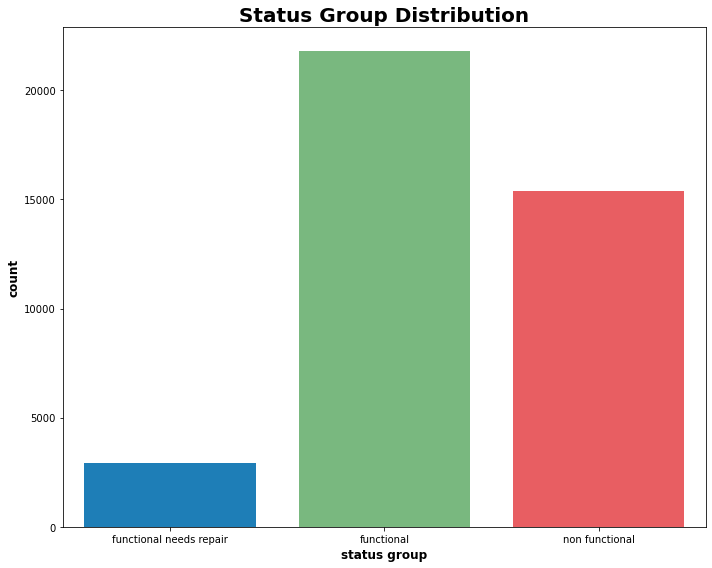

In [7]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(x='status_group', palette=palette, data=df)
plt.xlabel("status group", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group Distribution',fontweight='bold', size=20)
plt.tight_layout()
fig.savefig('images/status_group_distribiution.png');

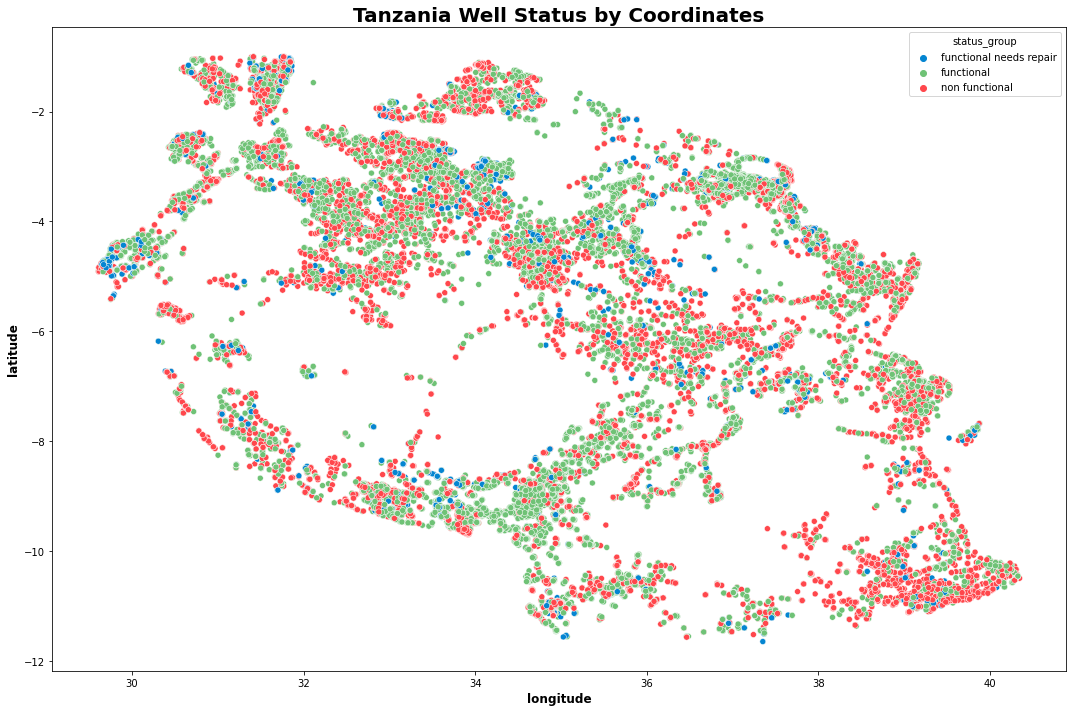

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='longitude', y='latitude', hue='status_group', palette=palette, sizes=(1, 8), data=viz_df, ax=ax)
plt.xlabel("longitude", fontweight='bold', size=12)
plt.ylabel("latitude", fontweight='bold', size=12)
plt.title('Tanzania Well Status by Coordinates',fontweight='bold', size=20)
plt.tight_layout()
fig.savefig('images/well_status_by_coordinates.png');

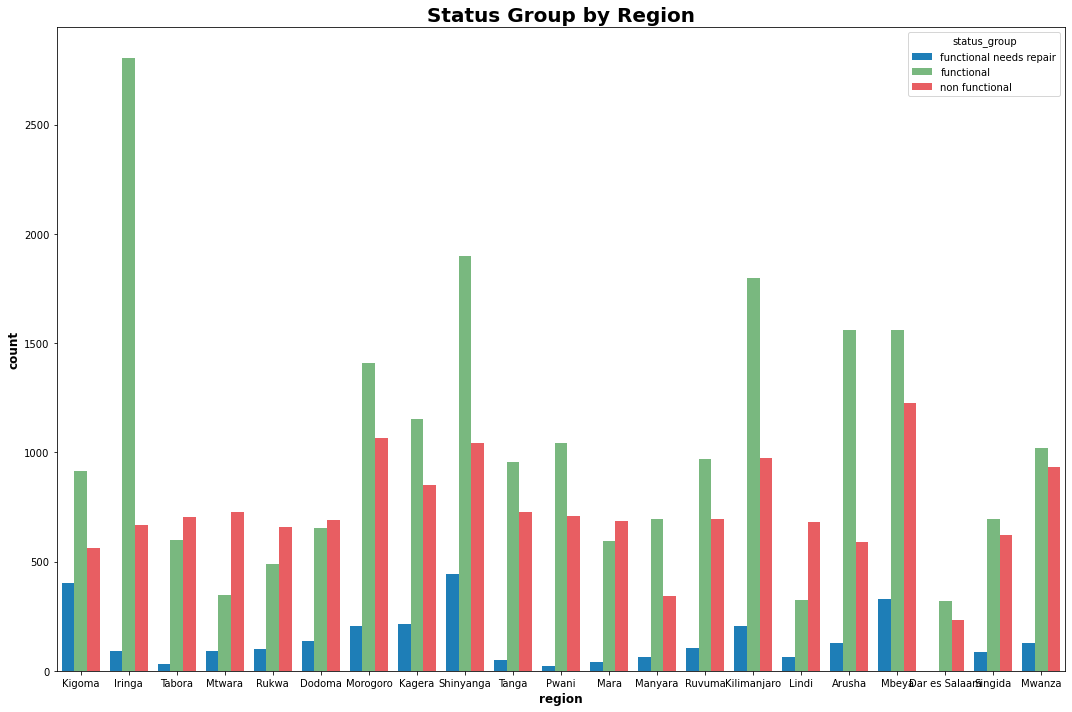

In [9]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='region', hue="status_group", palette=palette,data=df)
plt.xlabel("region", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Region', fontweight='bold', fontsize=20)
plt.tight_layout()
fig.savefig('images/status_group_by_region.png');

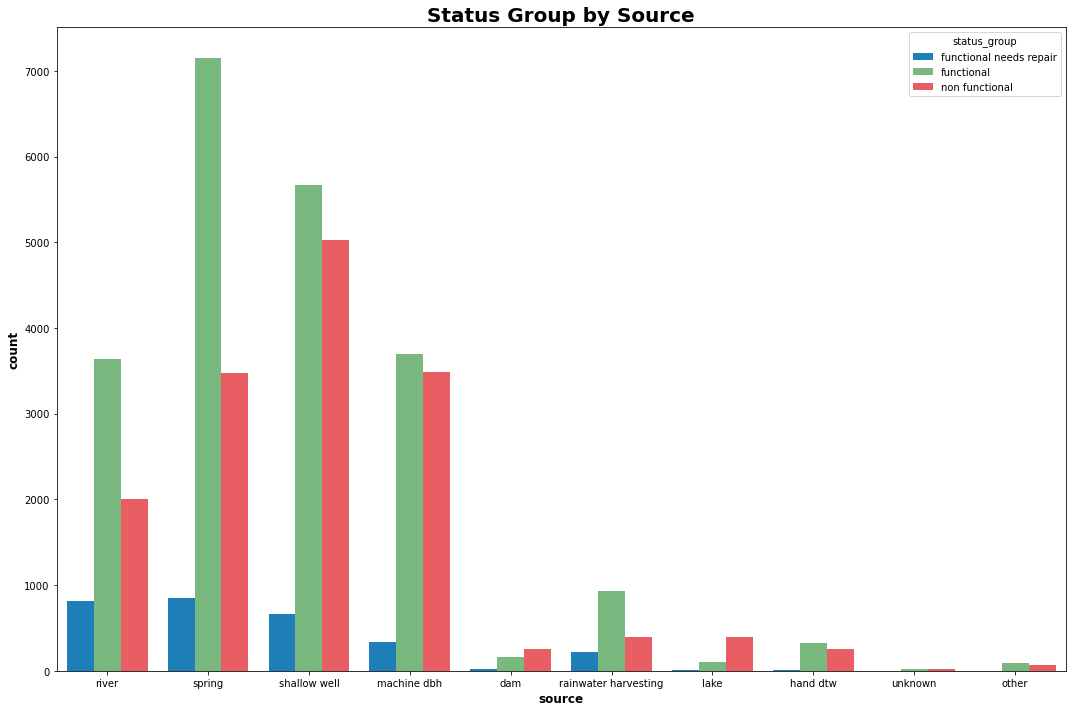

In [10]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='source', hue="status_group", palette=palette,data=df)
plt.xlabel("source", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Source',fontweight='bold', size=20)
plt.tight_layout()
fig.savefig('images/status_group_by_source.png');

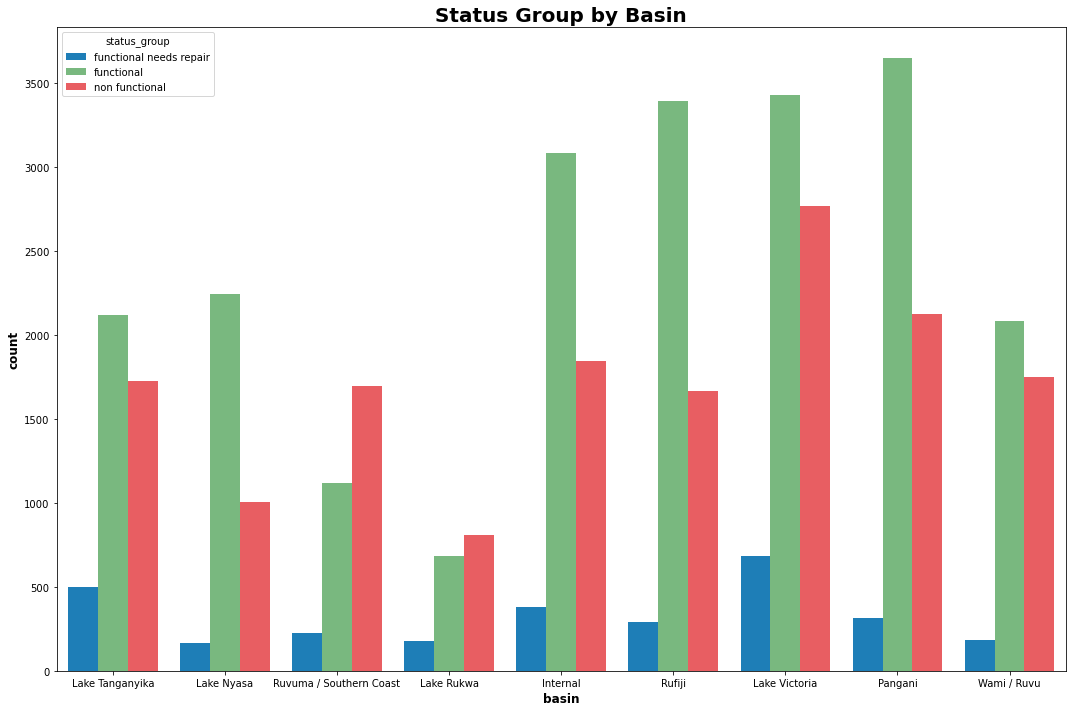

In [11]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='basin', hue="status_group", palette=palette,data=df)
plt.xlabel("basin", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Basin',fontweight='bold', size=20)
plt.tight_layout()
fig.savefig('images/status_group_by_basin.png');

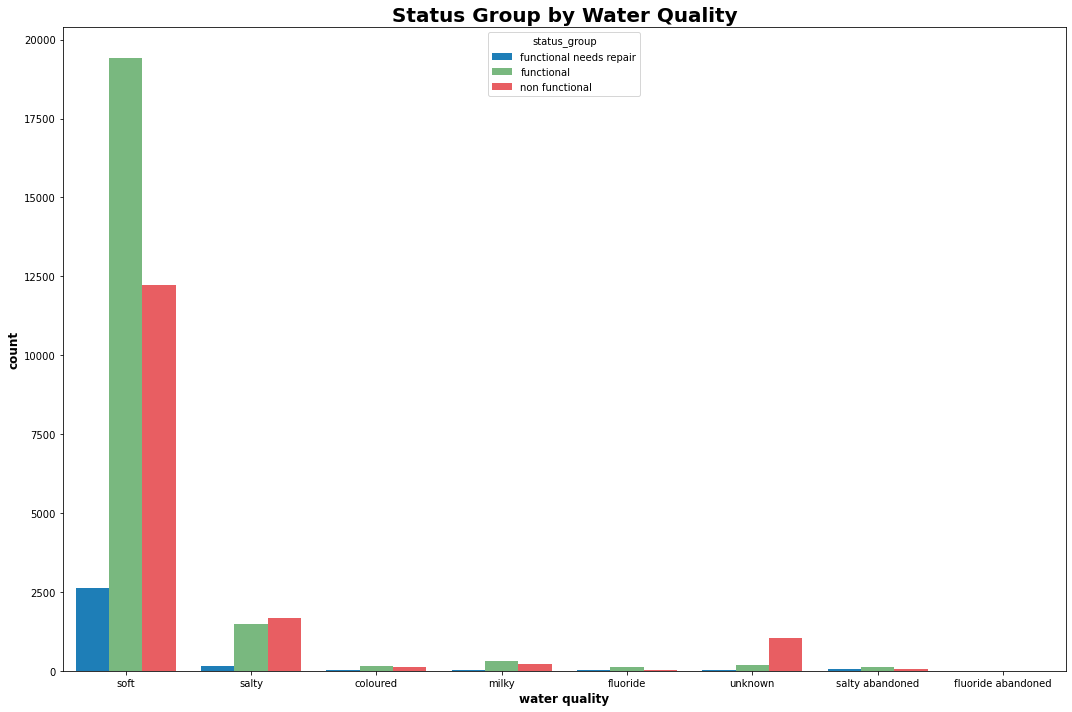

In [12]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='water_quality', hue="status_group", palette=palette,data=df)
plt.xlabel("water quality", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Water Quality',fontweight='bold', size=20)
plt.tight_layout()
fig.savefig('images/status_group_by_water_quality.png');

In [14]:
df_copy = df.copy(deep=True)
df_copy = df_copy[df_copy['construction_year'] != 0]
df['decade'] = df['construction_year']
df_copy['decade'].replace((1960,1961,1962,1963,1964,1965,1966,1967,1968,1969), '60s', inplace = True)
df_copy['decade'].replace((1970,1971,1972,1973,1974,1975,1976,1977,1978,1979), '70s', inplace = True)
df_copy['decade'].replace((1980,1981,1982,1983,1984,1985,1986,1987,1988,1989), '80s', inplace = True)
df_copy['decade'].replace((1990,1991,1992,1993,1994,1995,1996,1997,1998,1999), '90s', inplace = True)
df_copy['decade'].replace((2000,2001,2002,2003,2004,2005,2006,2007,2008,2009), '00s', inplace = True)
df_copy['decade'].replace((2010,2011,2012,2013,), '10s', inplace = True)

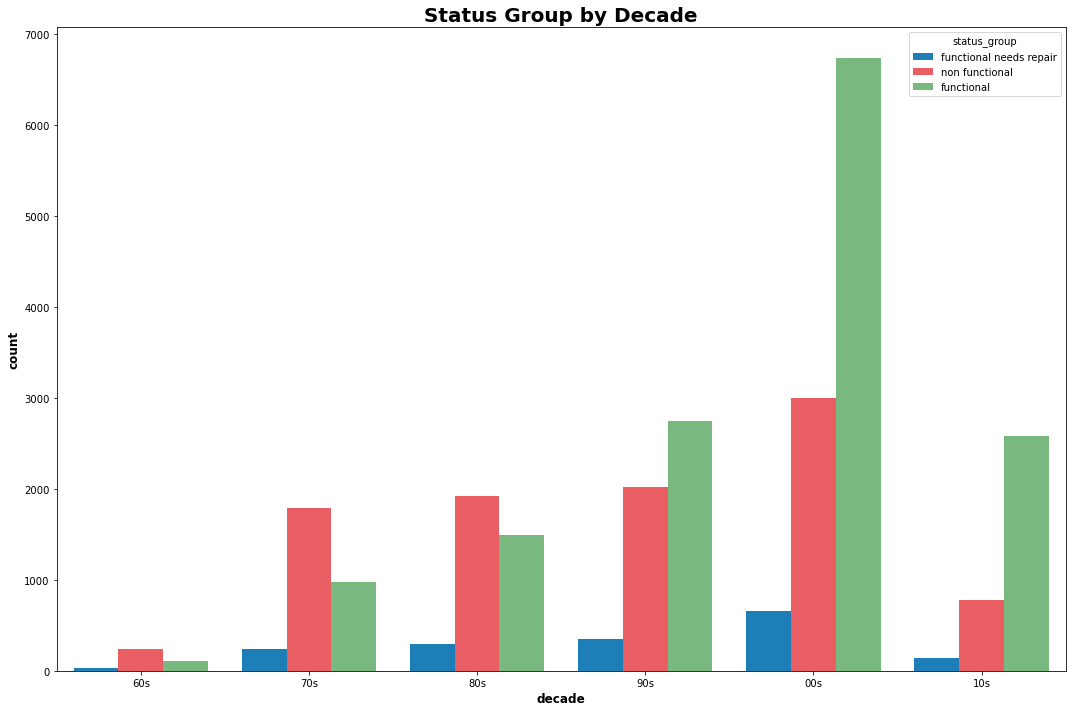

In [15]:
plt.figure(figsize = (15,10))
sns.countplot('decade', hue='status_group', palette=palette, data=df_copy, order=['60s', '70s', '80s', '90s', '00s', '10s'],
              hue_order=['functional needs repair', 'non functional', 'functional'])
plt.xlabel("decade", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Decade',fontweight='bold', size=20)
plt.tight_layout()
fig.savefig('images/status_group_by_water_decade.png');